<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               

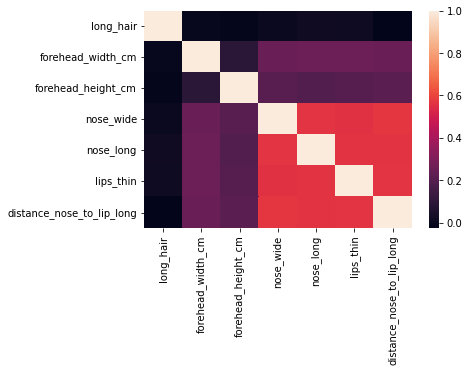

In [1]:


import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
data = pd.read_csv('/content/gender_classification_v7.csv', delimiter=',')

data.describe()

data.info()

import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

data['forehead_width_cm'].corr( data["lips_thin"])

data["nose_wide"].corr(data["lips_thin"])

data.gender.replace(('Male','Female'), (1, 0), inplace=True)

print(data)

import numpy as np
labels=data['gender']
features = data.iloc[:,0:8]
from sklearn.model_selection import train_test_split
X=features
y=np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(8,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=9, batch_size=1, verbose=1)

for layer in model.layers:
  weights = layer.get_weights()

predictions = (model.predict(X_test) > 0.5).astype("int32")

score = model.evaluate(X_test, y_test,verbose=1)
print(score)